# Visualization of COVID-19 Dynamics in chosen countries



In [1]:
import os
import gym
import math
from datetime import datetime
import json

import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

# Paths to files

data_dir, data_file = "./data", "owid-covid-data.csv"

epid_data_dir, epid_data_file = "./data/gcp", "epidemiology.csv"
hosp_data_dir, hosp_data_file = "./data/gcp", "hospitalizations.csv"
vacc_data_dir, vacc_data_file = "./data/gcp", "vaccinations.csv"


# Choose the start/end dates
start_date, end_date = "2021-10-01","2022-10-01"

### Italy


<Axes: xlabel='date'>

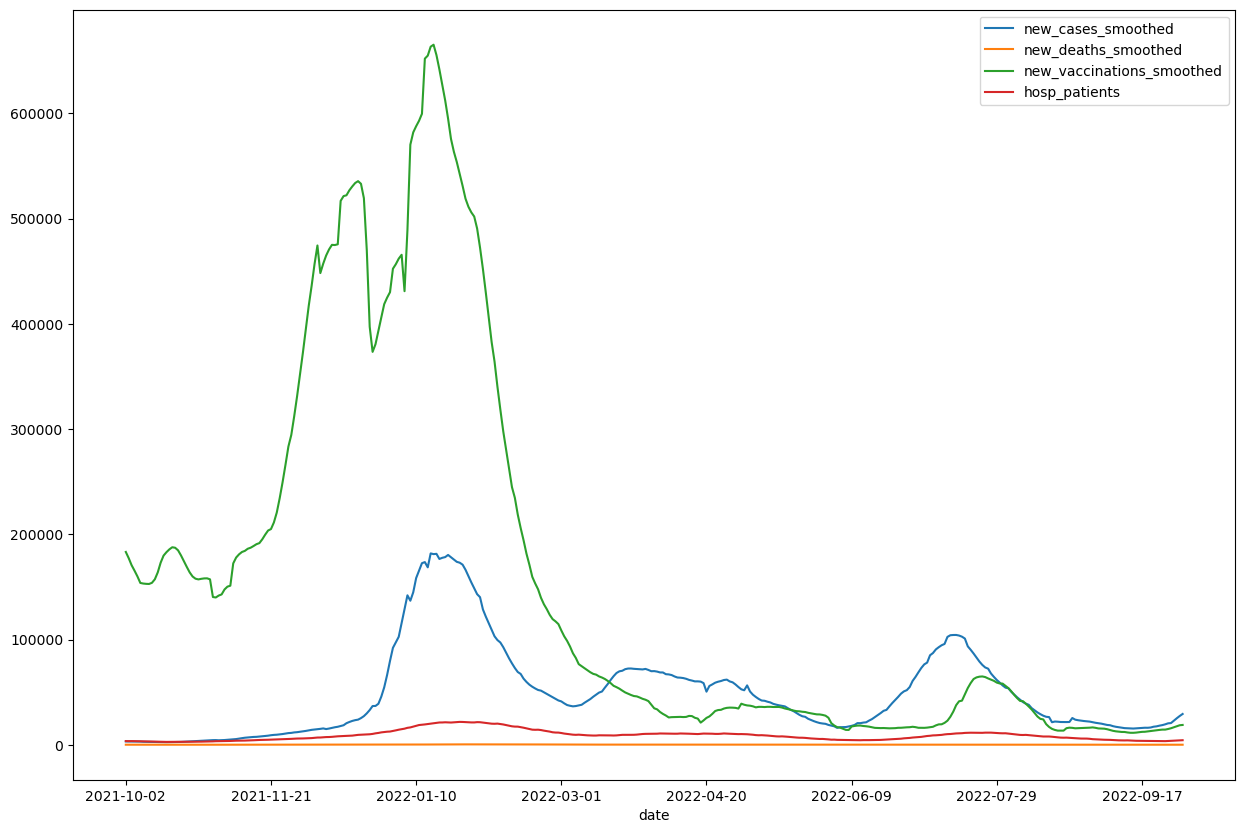

In [4]:
covid_italy = pd.read_csv(os.path.join(data_dir, data_file))

covid_italy = covid_italy[covid_italy["location"]=='Italy']
covid_italy = covid_italy[["date", "location", "new_cases_smoothed", "new_deaths_smoothed", "new_vaccinations_smoothed", "hosp_patients"]]
covid_italy = covid_italy[(covid_italy['date'] > start_date) & (covid_italy['date'] <= end_date)]
covid_italy.set_index('date', inplace=True)

#To complete the data that is missing, we use linear interpolation which treats the values as equally spaced.
covid_italy.interpolate().fillna(0).plot(figsize=(15, 10))

In [6]:
covid_italy.new_deaths_smoothed

date
2021-10-02     52.857
2021-10-03     49.286
2021-10-04     47.714
2021-10-05     46.571
2021-10-06     44.429
2021-10-07     41.000
2021-10-08     39.571
2021-10-09     36.429
2021-10-10     39.429
2021-10-11     38.571
2021-10-12     38.143
2021-10-13     38.000
2021-10-14     37.714
2021-10-15     37.571
2021-10-16     39.286
2021-10-17     34.714
2021-10-18     34.286
2021-10-19     35.714
2021-10-20     38.714
2021-10-21     38.143
2021-10-22     37.571
2021-10-23     37.143
2021-10-24     40.714
2021-10-25     40.714
2021-10-26     38.714
2021-10-27     35.571
2021-10-28     38.000
2021-10-29     40.000
2021-10-30     39.143
2021-10-31     38.857
2021-11-01     39.143
2021-11-02     37.714
2021-11-03     36.714
2021-11-04     38.571
2021-11-05     39.857
2021-11-06     42.429
2021-11-07     41.571
2021-11-08     40.714
2021-11-09     43.286
2021-11-10     47.143
2021-11-11     46.714
2021-11-12     47.857
2021-11-13     50.286
2021-11-14     53.429
2021-11-15     55.714
2021-

In [8]:
covid_italy.hosp_patients

date
2021-10-02     3489.0
2021-10-03     3422.0
2021-10-04     3469.0
2021-10-05     3401.0
2021-10-06     3287.0
2021-10-07     3227.0
2021-10-08     3125.0
2021-10-09     3059.0
2021-10-10     3015.0
2021-10-11     3062.0
2021-10-12     3035.0
2021-10-13     2919.0
2021-10-14     2838.0
2021-10-15     2802.0
2021-10-16     2723.0
2021-10-17     2735.0
2021-10-18     2786.0
2021-10-19     2778.0
2021-10-20     2819.0
2021-10-21     2795.0
2021-10-22     2786.0
2021-10-23     2793.0
2021-10-24     2814.0
2021-10-25     2917.0
2021-10-26     2945.0
2021-10-27     2956.0
2021-10-28     2956.0
2021-10-29     3007.0
2021-10-30     3053.0
2021-10-31     3096.0
2021-11-01     3227.0
2021-11-02     3377.0
2021-11-03     3410.0
2021-11-04     3428.0
2021-11-05     3519.0
2021-11-06     3565.0
2021-11-07     3613.0
2021-11-08     3777.0
2021-11-09     3857.0
2021-11-10     3870.0
2021-11-11     3931.0
2021-11-12     3970.0
2021-11-13     4050.0
2021-11-14     4105.0
2021-11-15     4283.0
2021-

### Japan

<Axes: xlabel='date'>

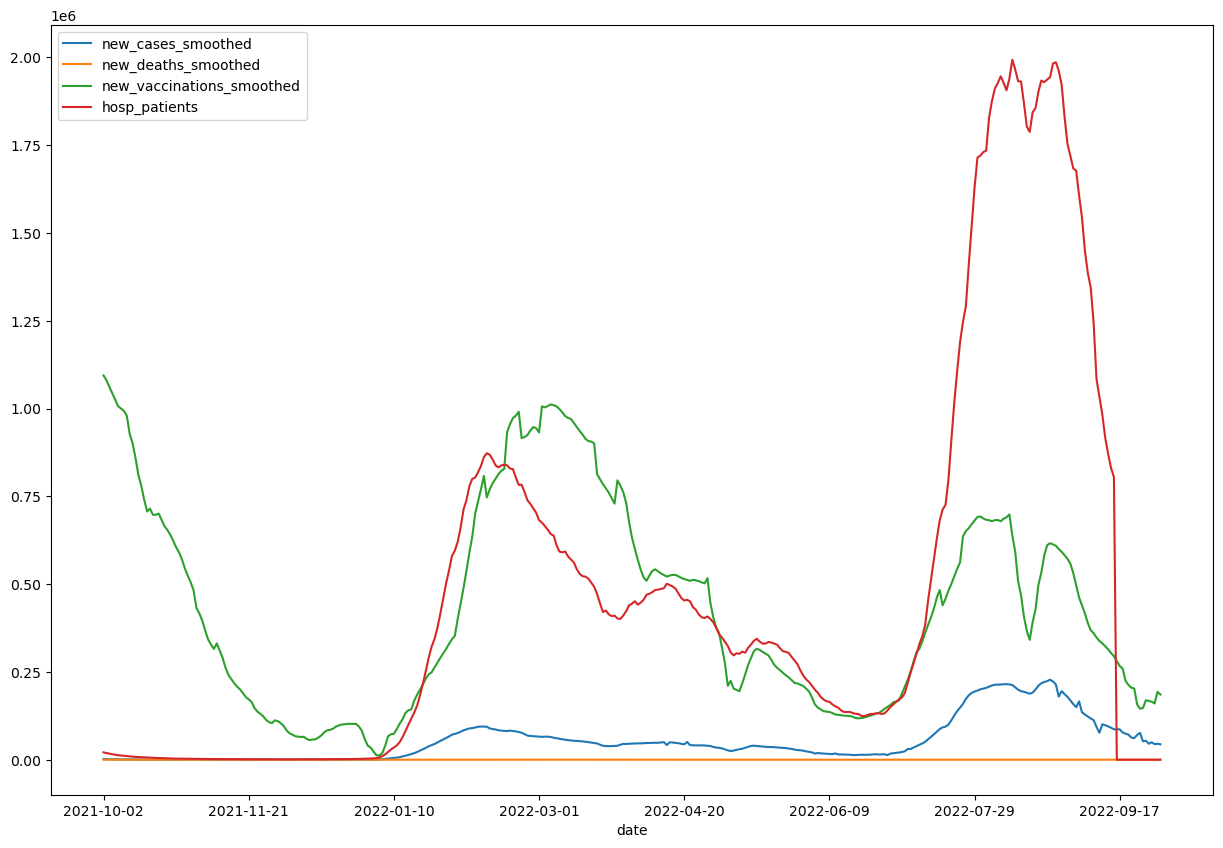

In [9]:
covid_japan1 = pd.read_csv(os.path.join(data_dir, data_file))
covid_japan2 = pd.read_csv(os.path.join(hosp_data_dir, hosp_data_file))
covid_japan3 = pd.read_csv(os.path.join(epid_data_dir, epid_data_file))

covid_japan1 = covid_japan1[covid_japan1["location"]=='Japan']
covid_japan1 = covid_japan1[["date", "location", "new_cases_smoothed", "new_deaths_smoothed", "new_vaccinations_smoothed"]]

covid_japan2 = covid_japan2[covid_japan2["location_key"]=='JP']
covid_japan2 = covid_japan2[['date', 'new_hospitalized_patients']]

covid_japan = pd.merge(covid_japan1, covid_japan2, on=['date'], how="outer")
covid_japan.rename(columns= {'new_hospitalized_patients' : 'hosp_patients'}, inplace=True)
covid_japan = covid_japan[(covid_japan['date'] > start_date) & (covid_japan['date'] <= end_date)]
covid_japan.set_index('date', inplace=True)

covid_japan.fillna(0).plot(figsize=(15, 10))

### United Kingdom

<Axes: xlabel='date'>

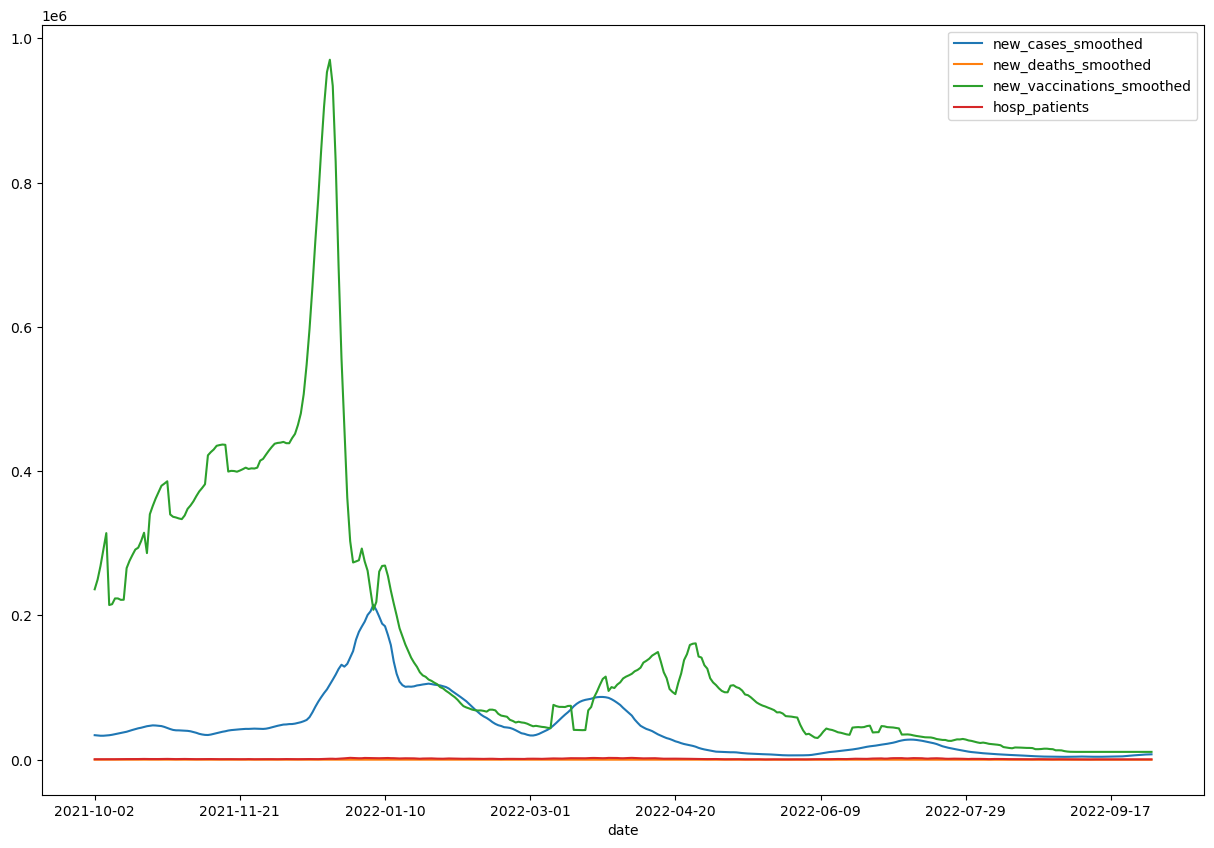

In [10]:
covid_uk1 = pd.read_csv(os.path.join(data_dir, data_file))
covid_uk2 = pd.read_csv(os.path.join(hosp_data_dir, hosp_data_file))

covid_uk1 = covid_uk1[covid_uk1["location"]=='United Kingdom']
covid_uk1 = covid_uk1[["date", "location", "new_cases_smoothed", "new_deaths_smoothed", "new_vaccinations_smoothed"]]

covid_uk2 = covid_uk2[covid_uk2["location_key"]=='GB']
covid_uk2 = covid_uk2[['date', 'new_hospitalized_patients']]

covid_uk = pd.merge(covid_uk1, covid_uk2, on=['date'], how="outer")
covid_uk.rename(columns= {'new_hospitalized_patients' : 'hosp_patients'}, inplace=True)

covid_uk = covid_uk[(covid_uk['date'] > start_date) & (covid_uk['date'] <= end_date)]
covid_uk.set_index('date', inplace=True)

covid_uk.interpolate().fillna(0).plot(figsize=(15,10))

### United States

<Axes: xlabel='date'>

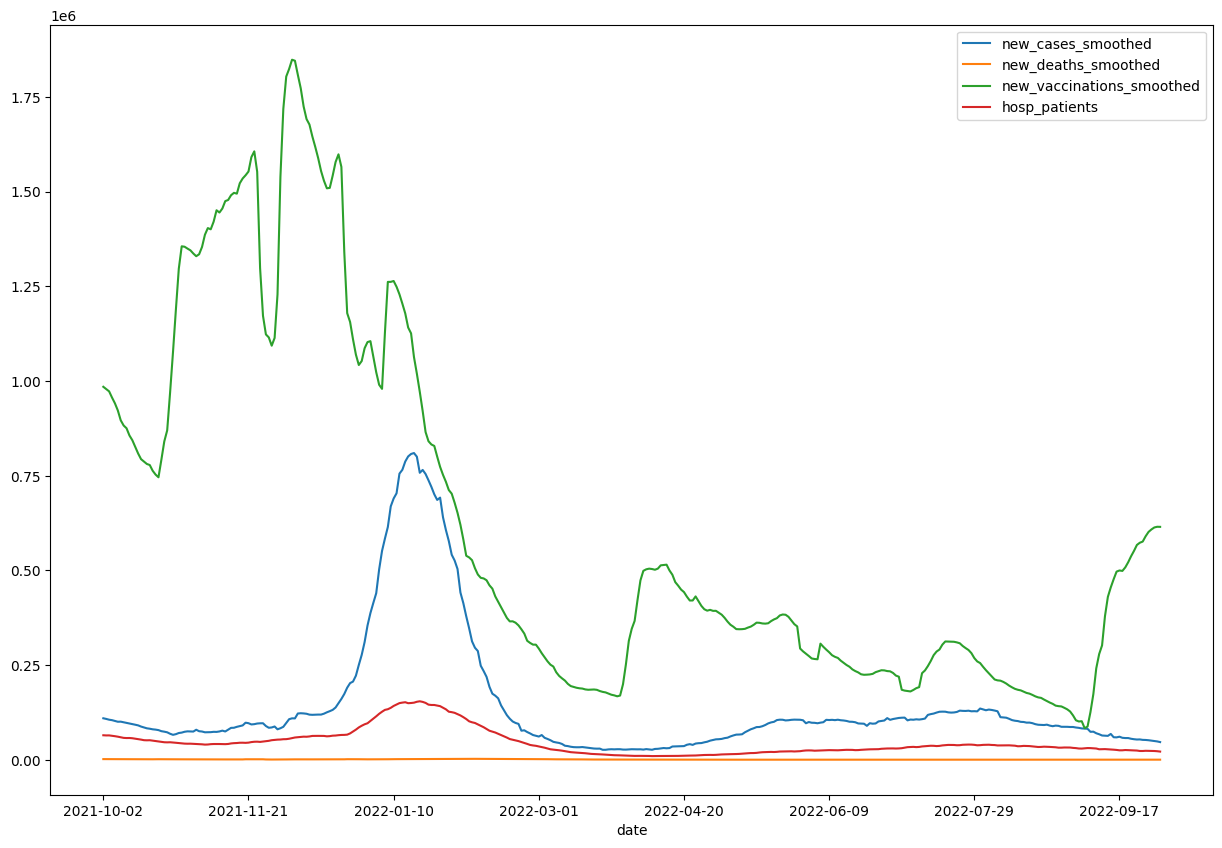

In [6]:
covid_usa = pd.read_csv(os.path.join(data_dir, data_file))

covid_usa = covid_usa[covid_usa["location"]=='United States']
covid_usa = covid_usa[["date","location", "new_cases_smoothed", "new_deaths_smoothed", "new_vaccinations_smoothed", "hosp_patients"]]
covid_usa = covid_usa[(covid_usa['date'] > start_date) & (covid_usa['date'] <= end_date)]
covid_usa.set_index('date', inplace=True)

covid_usa.interpolate().fillna(0).plot(figsize=(15, 10))

### France

<Axes: xlabel='date'>

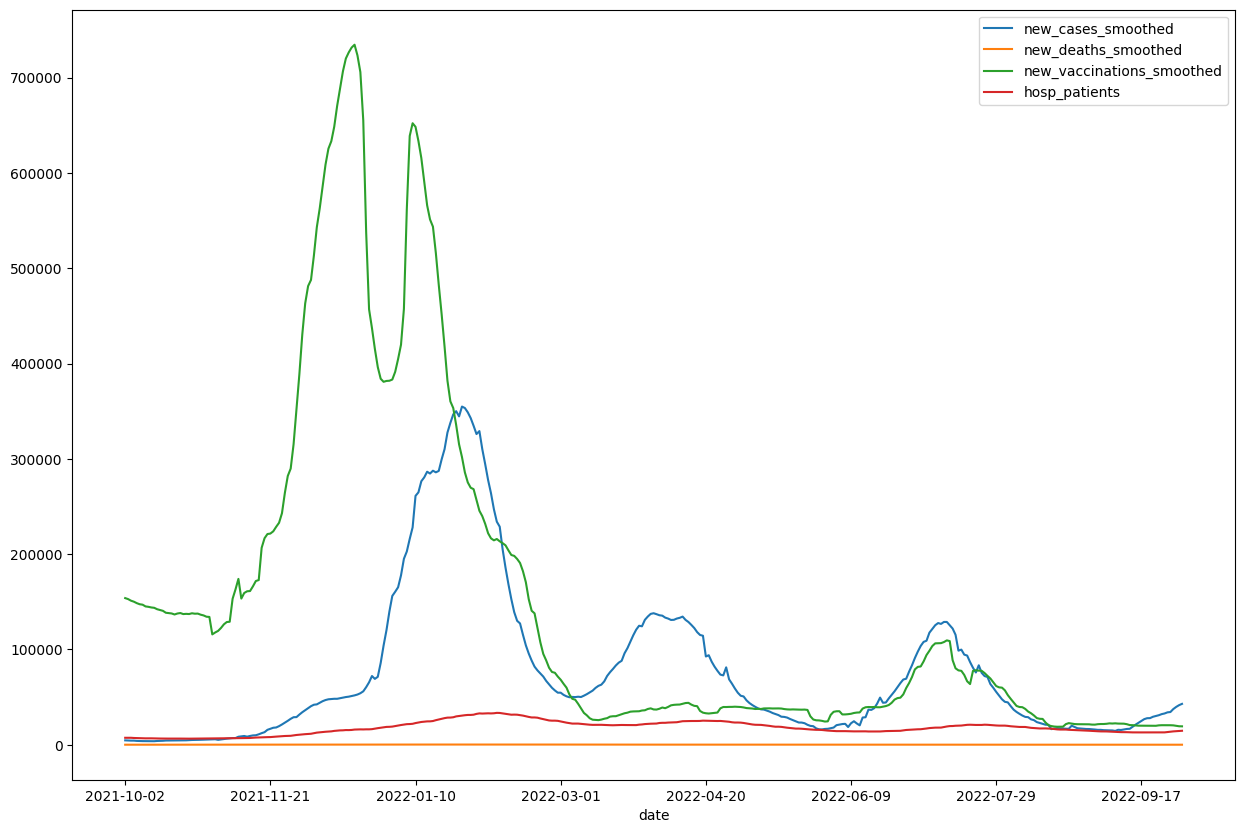

In [7]:
covid_france = pd.read_csv(os.path.join(data_dir, data_file))

covid_france = covid_france[covid_france["location"]=='France']
covid_france = covid_france[["date", "location", "new_cases_smoothed", "new_deaths_smoothed", "new_vaccinations_smoothed", "hosp_patients"]]
covid_france = covid_france[(covid_france['date'] > start_date) & (covid_france['date'] <= end_date)]
covid_france.set_index('date', inplace=True)

covid_france.interpolate().fillna(0).plot(figsize=(15, 10))

### Sweden

<Axes: xlabel='date'>

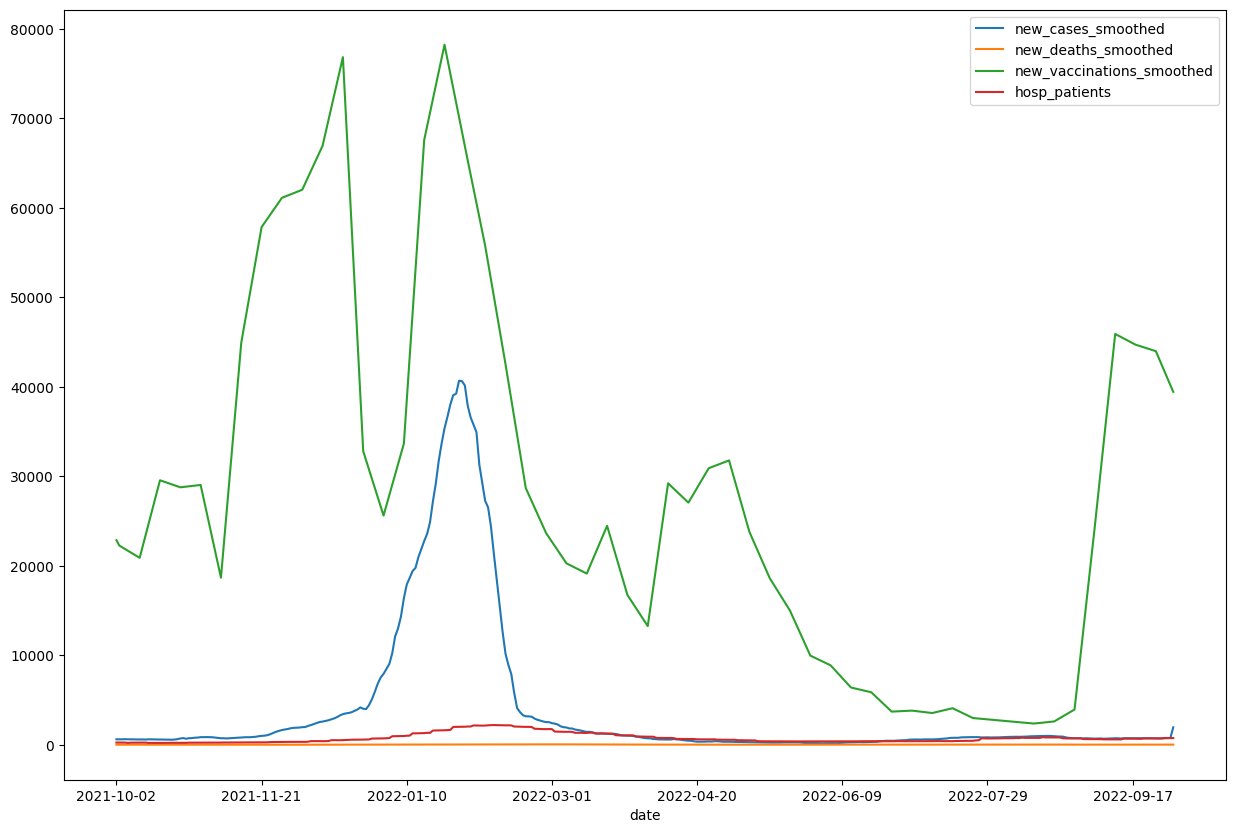

In [8]:
covid_sweden = pd.read_csv(os.path.join(data_dir, data_file))

covid_sweden = covid_sweden[covid_sweden["location"]=='Sweden']
covid_sweden = covid_sweden[["date", "location", "new_cases_smoothed", "new_deaths_smoothed", "new_vaccinations_smoothed", "hosp_patients"]]
covid_sweden = covid_sweden[(covid_sweden['date'] > start_date) & (covid_sweden['date'] <= end_date)]

covid_sweden.set_index('date', inplace=True)

covid_sweden.interpolate().fillna(0).plot(figsize=(15, 10))

### Canada

<Axes: xlabel='date'>

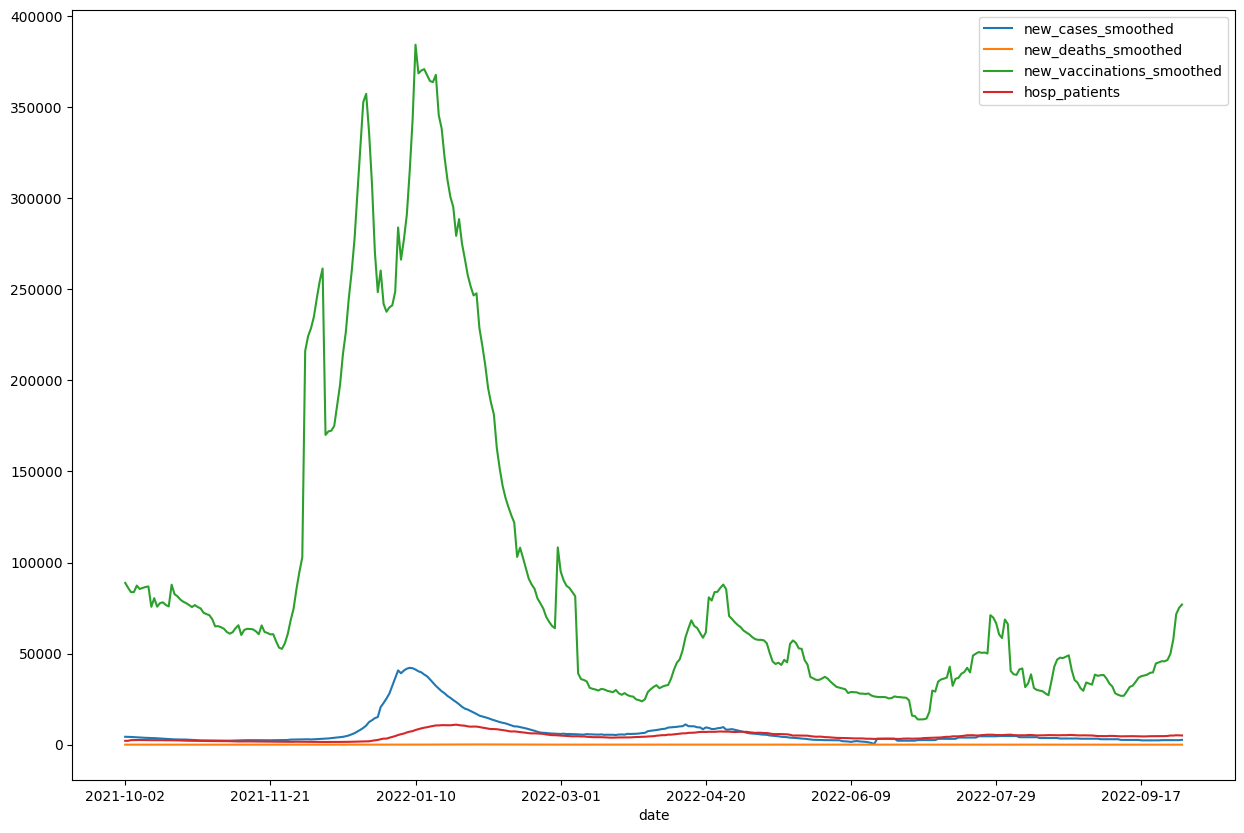

In [9]:
covid_canada = pd.read_csv(os.path.join(data_dir, data_file))

covid_canada = covid_canada[covid_canada["location"]=='Canada']
covid_canada = covid_canada[["date", "new_cases_smoothed", "new_deaths_smoothed", "new_vaccinations_smoothed",  "hosp_patients"]]
covid_canada = covid_canada[(covid_canada['date'] > start_date) & (covid_canada['date'] <= end_date)]
covid_canada.set_index('date', inplace=True)

covid_canada.interpolate().fillna(0).plot(figsize=(15, 10))

### South Africa

<Axes: xlabel='date'>

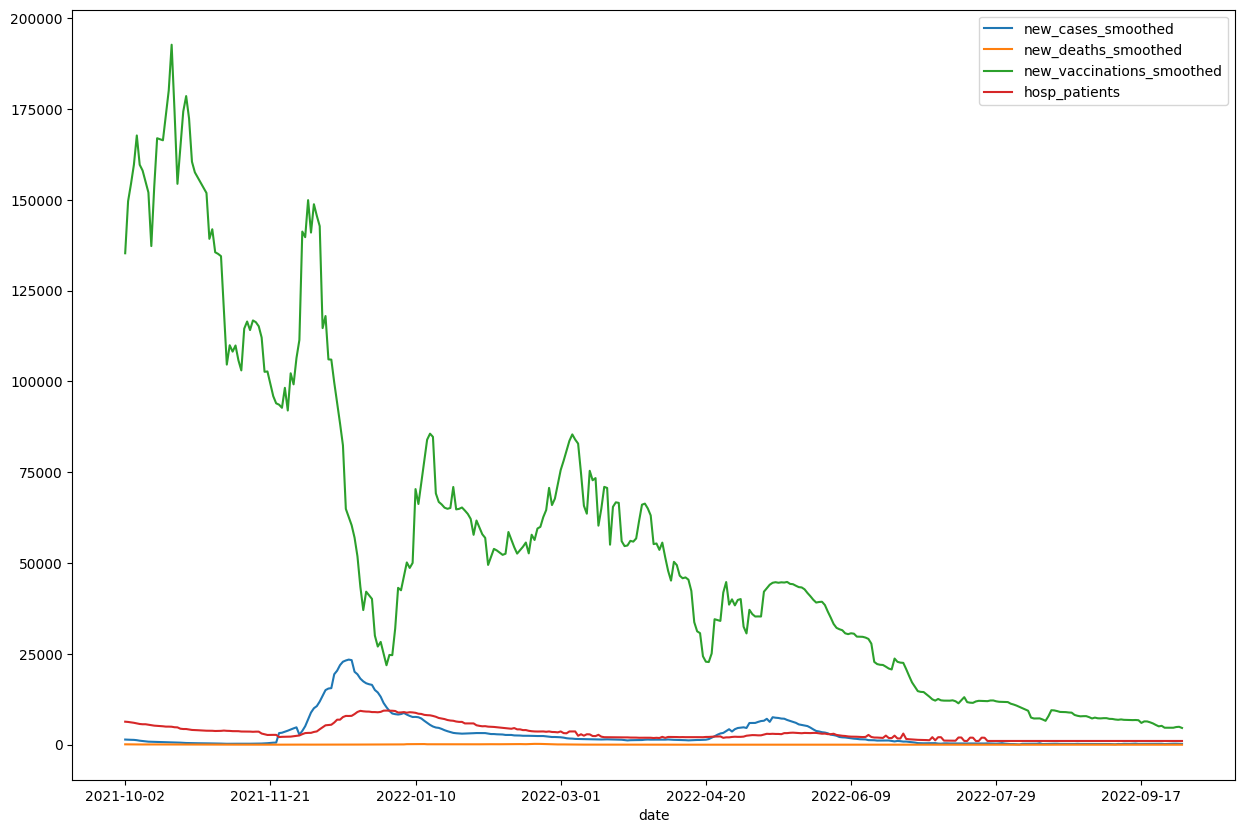

In [10]:
covid_south_africa = pd.read_csv(os.path.join(data_dir, data_file))

covid_south_africa = covid_south_africa[covid_south_africa["location"]=='South Africa']
covid_south_africa = covid_south_africa[["date", "new_cases_smoothed", "new_deaths_smoothed", "new_vaccinations_smoothed", "hosp_patients"]]
covid_south_africa = covid_south_africa[(covid_south_africa['date'] > start_date) & (covid_south_africa['date'] <= end_date)]
covid_south_africa.set_index('date', inplace=True)

covid_south_africa.interpolate().fillna(0).plot(figsize=(15, 10))

# Generate data_file

In [11]:
now = datetime.now().strftime("%d-%m-%Y_%Hh%Mm%Ss")
save_dir = "data/test/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
countries_data = [covid_italy, covid_france, covid_canada, covid_japan, covid_sweden, covid_south_africa, covid_uk, covid_usa]

covid_data = pd.concat(countries_data)
covid_data.reset_index().to_csv(f"{save_dir}covid_test_data_{now}.csv", index=False)